# Dimensionality Reduction - PCA (Steps)

## Theoritical View 

### Step 1: Standardization
- Ensure all variables contribute equally to the analysis by standardizing their ranges.
- Subtract the mean and divide by the standard deviation for each variable.
- Prevents bias in PCA due to differences in variable ranges.
### Step 2: Covariance Matrix Computation
- Objective: Understand relationships between variables; identify correlations.
- Process: Compute the covariance matrix, a symmetric matrix showing covariances between all variable pairs.
- Interpretation: Positive covariance indicates variables increase/decrease together; negative indicates an inverse correlation.
### Step 3: Compute Eigenvalues and Eigenvectors of Covariance Matrix
- Objective: Identify principal components (new uncorrelated variables) that capture most information.
- Concepts: Eigenvectors are directions of maximal variance (principal components); eigenvalues are coefficients indicating the amount of variance.
- Implementation: Rank eigenvectors by corresponding eigenvalues; higher eigenvalues indicate more significant principal components.
##### `hint` : `The eigenvectors of the covariance matrix represent the directions of maximum variance in the dataset. These eigenvectors are considered characteristic or "own" to the covariance matrix because they define the principal components that capture the most significant information about the data.`
### Step 4: Feature Vector
- Objective: Choose significant principal components for dimensionality reduction.
- Process: Form a feature vector with selected eigenvectors; discard less significant components if desired.
- Importance: Feature vector is the first step towards dimensionality reduction; retains most important information.
### Step 5: Recast the Data Along the Principal Components Axes
- Reorient data from original axes to principal components axes.
- Implementation: Multiply the transpose of the original data set by the transpose of the feature vector.
- Result: Represents data in terms of new, uncorrelated variables (principal components).

# This code translates the theoretical steps into a practical, executable form using Python.

In [2]:
import pandas as pd
df = pd.read_csv("Heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.shape

(918, 12)

In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Remove outliers using Z score

In [5]:
from scipy import stats

# Define a threshold for Z score (e.g., 3)
z_threshold = 3

# Calculate Z scores for each column
z_scores = stats.zscore(df.select_dtypes(include=['float64', 'int64']))

# Remove rows with outliers
df_no_outliers = df[(z_scores < z_threshold).all(axis=1)]
df_no_outliers.shape

(902, 12)

In [6]:
df_no_outliers.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Convert text columns to numbers using label encoding and one-hot encoding:

In [7]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()

columns_to_encode = ['RestingECG', 'ExerciseAngina', 'ST_Slope', 'Sex']

for column in columns_to_encode:
    df_no_outliers[column + '_encoded'] = label_encoder.fit_transform(df_no_outliers[column])

df_no_outliers.drop(columns=columns_to_encode, inplace=True)

#one hot encoding
df_no_outliers = pd.get_dummies(df_no_outliers, columns=['ChestPainType'], drop_first=True)

df_no_outliers.head()

C:\Users\Venura Pussella\AppData\Local\Temp\ipykernel_22944\3342362850.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers[column + '_encoded'] = label_encoder.fit_transform(df_no_outliers[column])
C:\Users\Venura Pussella\AppData\Local\Temp\ipykernel_22944\3342362850.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers[column + '_encoded'] = label_encoder.fit_transform(df_no_outliers[column])
C:\Users\Venura Pussella\AppData\Local\Temp\ipykernel_22944\3342362850.py:9: SettingWi

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,RestingECG_encoded,ExerciseAngina_encoded,ST_Slope_encoded,Sex_encoded,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289,0,172,0.0,0,1,0,2,1,1,0,0
1,49,160,180,0,156,1.0,1,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,2,0,2,1,1,0,0
3,48,138,214,0,108,1.5,1,1,1,1,0,0,0,0
4,54,150,195,0,122,0.0,0,1,0,2,1,0,1,0


### Apply Scaling

In [8]:
from sklearn.preprocessing import StandardScaler

X = df_no_outliers.drop('HeartDisease', axis=1)
y = df_no_outliers['HeartDisease']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Building a classification model using various methods (SVM, Logistic regression, Random forest)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build and evaluate SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)

# Build and evaluate Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print("Logistic Regression Accuracy:", lr_accuracy)

# Build and evaluate Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)


SVM Accuracy: 0.8729281767955801
Logistic Regression Accuracy: 0.8453038674033149
Random Forest Accuracy: 0.861878453038674


### Use PCA to reduce dimensions, retrain the model, and see the impact on accuracy:

In [10]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions
pca = PCA(n_components=2)  # You may choose an appropriate number of components
X_pca = pca.fit_transform(X_scaled)

# Split the PCA-transformed dataset
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Retrain models after PCA
svm_model_pca = SVC()
svm_model_pca.fit(X_train_pca, y_train_pca)
svm_predictions_pca = svm_model_pca.predict(X_test_pca)
svm_accuracy_pca = accuracy_score(y_test_pca, svm_predictions_pca)
print("SVM Accuracy after PCA:", svm_accuracy_pca)

lr_model_pca = LogisticRegression()
lr_model_pca.fit(X_train_pca, y_train_pca)
lr_predictions_pca = lr_model_pca.predict(X_test_pca)
lr_accuracy_pca = accuracy_score(y_test_pca, lr_predictions_pca)
print("Logistic Regression Accuracy after PCA:", lr_accuracy_pca)

rf_model_pca = RandomForestClassifier()
rf_model_pca.fit(X_train_pca, y_train_pca)
rf_predictions_pca = rf_model_pca.predict(X_test_pca)
rf_accuracy_pca = accuracy_score(y_test_pca, rf_predictions_pca)
print("Random Forest Accuracy after PCA:", rf_accuracy_pca)

SVM Accuracy after PCA: 0.8342541436464088
Logistic Regression Accuracy after PCA: 0.8232044198895028
Random Forest Accuracy after PCA: 0.8287292817679558


In [11]:
from sklearn.metrics import precision_score, recall_score

# SVM
svm_recall_pca = recall_score(y_test_pca, svm_predictions_pca)
svm_precision_pca = precision_score(y_test_pca, svm_predictions_pca)
print("SVM Recall after PCA:", svm_recall_pca)
print("SVM Precision after PCA:", svm_precision_pca)

# Logistic Regression
lr_recall_pca = recall_score(y_test_pca, lr_predictions_pca)
lr_precision_pca = precision_score(y_test_pca, lr_predictions_pca)
print("Logistic Regression Recall after PCA:", lr_recall_pca)
print("Logistic Regression Precision after PCA:", lr_precision_pca)

# Random Forest
rf_recall_pca = recall_score(y_test_pca, rf_predictions_pca)
rf_precision_pca = precision_score(y_test_pca, rf_predictions_pca)
print("Random Forest Recall after PCA:", rf_recall_pca)
print("Random Forest Precision after PCA:", rf_precision_pca)


SVM Recall after PCA: 0.84375
SVM Precision after PCA: 0.84375
Logistic Regression Recall after PCA: 0.8333333333333334
Logistic Regression Precision after PCA: 0.8333333333333334
Random Forest Recall after PCA: 0.8229166666666666
Random Forest Precision after PCA: 0.8494623655913979


### Confusion Matrix

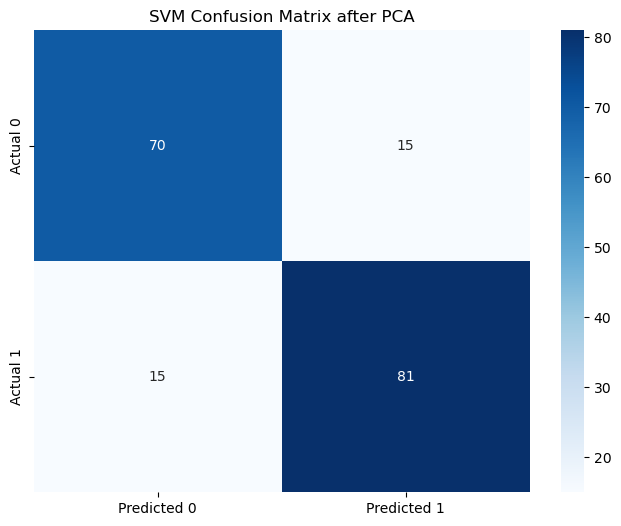

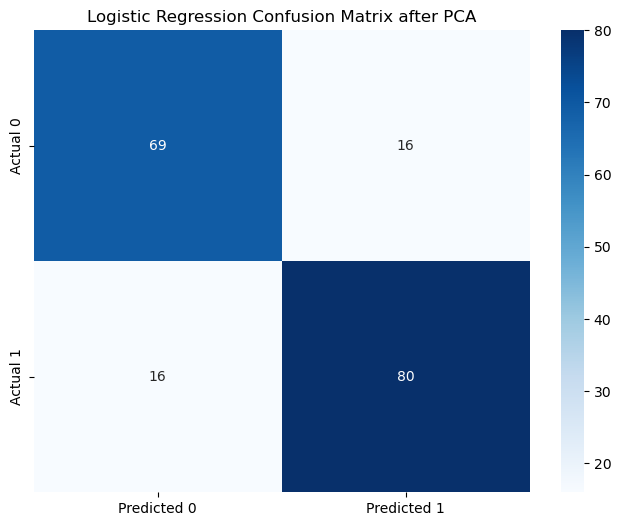

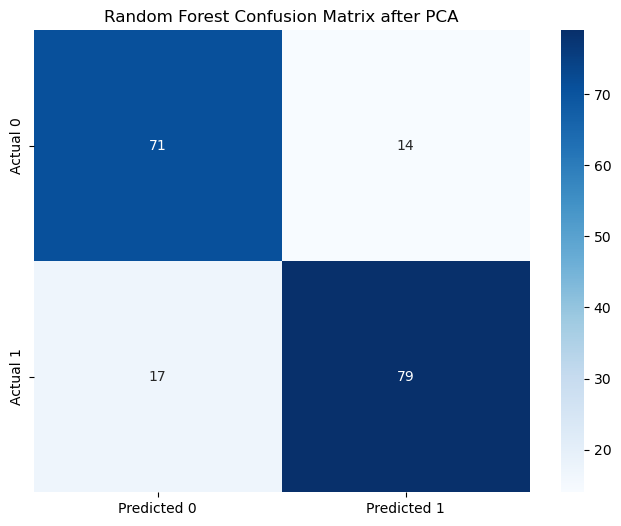

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix for SVM
svm_conf_matrix_pca = confusion_matrix(y_test_pca, svm_predictions_pca)
plt.figure(figsize=(8, 6))
sns.heatmap(svm_conf_matrix_pca, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('SVM Confusion Matrix after PCA')
plt.show()

# Confusion Matrix for Logistic Regression
lr_conf_matrix_pca = confusion_matrix(y_test_pca, lr_predictions_pca)
plt.figure(figsize=(8, 6))
sns.heatmap(lr_conf_matrix_pca, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Logistic Regression Confusion Matrix after PCA')
plt.show()

# Confusion Matrix for Random Forest
rf_conf_matrix_pca = confusion_matrix(y_test_pca, rf_predictions_pca)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix_pca, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Random Forest Confusion Matrix after PCA')
plt.show()


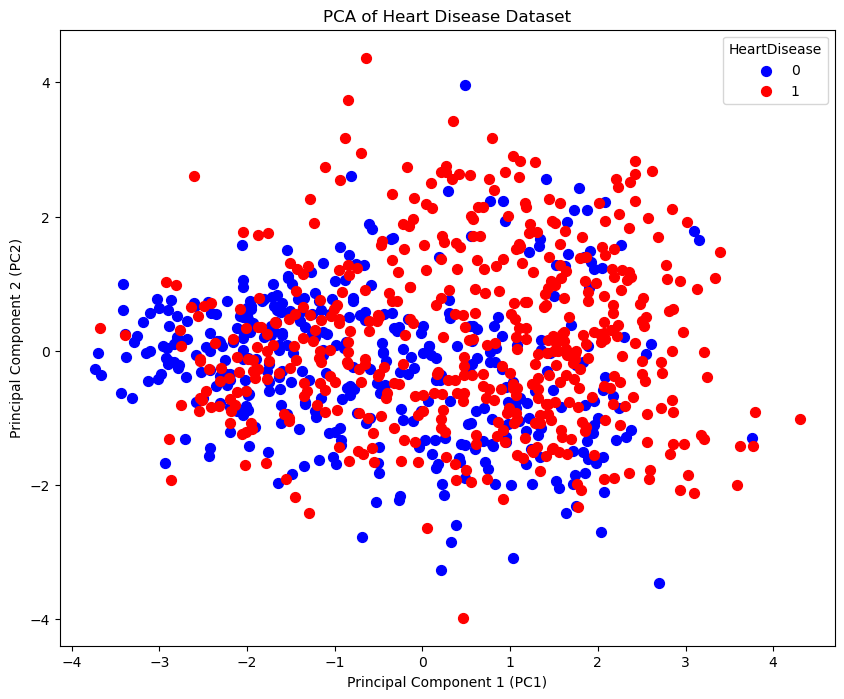

In [13]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


pca = PCA(n_components=2) 
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame with the principal components and target variable
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['HeartDisease'] = df_no_outliers['HeartDisease'] # adding the column to df_pca data frame

# Plot the PCA results
plt.figure(figsize=(10, 8))
targets = [0, 1] 
colors = ['blue', 'red']

for target, color in zip(targets, colors):
    indices_to_keep = df_pca['HeartDisease'] == target
    plt.scatter(df_pca.loc[indices_to_keep, 'PC1'],
                df_pca.loc[indices_to_keep, 'PC2'],
                c=color,
                s=50)

plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(targets, title='HeartDisease', loc='upper right')
plt.title('PCA of Heart Disease Dataset')
plt.show()


## PCA in Simple Terms
- PCA is a dimensionality reduction technique that identifies the principal components of the data, which are orthogonal (uncorrelated) vectors that capture the maximum variance.
- It transforms the original features into a new set of uncorrelated features (principal components) while retaining as much variance as possible.
- PCA is particularly useful when there are many correlated features in the dataset. By selecting a subset of principal components, it reduces the dimensionality without losing much information.